## RM99389 - Victor Flávio Demarchi Viana
## RM551117 - Lorenzo Gomes Andreata
## RM550695 - Gabriel Ferla

# Filmes: Como lucrar
#### Filmes, em sua grande maioria, custam dezenas, senão centenas de milhões para serem produzidos ao longo de anos, portanto quando o mesmo é lançado nos cinemas, é crucial que haja retorno suficiente para não só cobrir as despesas, mas também lucro, para compensar o tempo e esforço gastos para a produção dele.

#### A análise nesse documento se aprofundará sobre os filmes que conseguiram atingir suas metas de gastos e conseguiram gerar lucro em cima de suas vendas de ingressos, ao mesmo tempo que analisar algumas estratégias de mercado que separam estudios com bom e mau gerenciamento de recursos.

# Instruções da pesquisa

Para entender como analisamos os dados e os resultados que chegamos, realizaremos 10 perguntas concisas que nos forneçam dados relevantes sobre filmes boxoffice, para dessa forma obter insights importantes para tomadas de decisão na hora de produzir ou investir em um filme.

## Importando as bibliotecas necessárias para as análises

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importando e analisando informações básicas dos dataframes

In [3]:
db_netflix = pd.read_csv("netflix_titles.csv")
db_rotten_tomatoes = pd.read_csv("rotten_tomatoes_movies.csv")
db_box_office = pd.read_csv("box office.csv")
db_movie_dataset = pd.read_csv("movie_dataset.csv")
db_bollywood_box_clean = pd.read_csv("bollywood_box_clean.csv")

In [ ]:
db_netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
db_rotten_tomatoes

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17707,m/zoot_suit,Zoot Suit,Mexican-American gangster Henry Reyna (Daniel ...,NaN,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02,...,MCA Universal Home Video,Rotten,56.0,9.0,Upright,74.0,1195.0,2,5,4
17708,m/zootopia,Zootopia,From the largest elephant to the smallest shre...,The brilliantly well-rounded Zootopia offers a...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","J.K. Simmons, Kristen Bell, Octavia Spencer, A...",2016-03-04,...,Walt Disney Animation Studios,Certified-Fresh,98.0,291.0,Upright,92.0,101511.0,50,285,7
17709,m/zorba_the_greek,Zorba the Greek,Traveling to inspect an abandoned mine his fat...,NaN,NR,"Action & Adventure, Art House & International,...",NaN,NaN,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1964-12-17,...,Fox,Fresh,80.0,10.0,Upright,86.0,7146.0,0,8,2
17710,m/zulu,Zulu,"In 1879, the Zulu nation hands colonial Britis...",Zulu patiently establishes a cast of colorful ...,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,...,Paramount Pictures,Fresh,96.0,23.0,Upright,91.0,30193.0,6,22,1


In [ ]:
db_box_office

,Title,Worldwide,Domestic,Domestic_percent,Foreign,Foreign_percent
0,Avengers: Endgame,"$2,797,501,328","$858,373,000",30.70%,"$1,939,128,328",69.30%
1,Star Wars: Episode VII - The Force Awakens,"$2,068,223,624","$936,662,225",45.30%,"$1,131,561,399",54.70%
2,Avengers: Infinity War,"$2,048,359,754","$678,815,482",33.10%,"$1,369,544,272",66.90%
3,Spider-Man: No Way Home,"$1,906,693,477","$804,793,477",42.20%,"$1,101,900,000",57.80%
4,Jurassic World,"$1,670,400,637","$652,270,625",39%,"$1,018,130,012",61%
...,...,...,...,...,...,...
2595,Military Wives,"$4,890,505",-,-,"$4,890,505",100%
2596,Panga,"$4,886,124","$582,720",11.90%,"$4,303,404",88.10%
2597,The Tales for Old and Young,"$4,853,143",-,-,"$4,853,143",100%
2598,Streltsov,"$4,850,073",-,-,"$4,850,073",100%


In [ ]:
db_movie_dataset

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,220000,Action Crime Thriller,NaN,9367,united states\u2013mexico barrier legs arms pa...,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,...,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,Carlos Gallardo Jaime de Hoyos Peter Marquardt...,"[{'name': 'Robert Rodriguez', 'gender': 0, 'de...",Robert Rodriguez
4799,4799,9000,Comedy Romance,NaN,72766,NaN,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,...,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Edward Burns Kerry Bish\u00e9 Marsha Dietlein ...,"[{'name': 'Edward Burns', 'gender': 2, 'depart...",Edward Burns
4800,4800,0,Comedy Drama Romance TV Movie,http://www.hallmarkchannel.com/signedsealeddel...,231617,date love at first sight narration investigati...,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,...,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6,Eric Mabius Kristin Booth Crystal Lowe Geoff G...,"[{'name': 'Carla Hetland', 'gender': 0, 'depar...",Scott Smith
4801,4801,0,NaN,http://shanghaicalling.com/,126186,NaN,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,...,98.0,"[{""iso_639_1"": ""en

In [ ]:
db_bollywood_box_clean

,movie_name,movie_opening,movie_weekend,movie_firstweek,movie_total,movie_total_worldwide,movie_genre,movie_director,release_date,release_day,release_month,release_year,runtime,producer,banner,actors,movie_details
0,Angrezi Medium,4.03,9.03,9.36,9.36,13.50,"Drama, Comedy",Homi Adajania,"13 March, 2020",13,Mar,2020,145,"Dinesh Vijan , Jyoti Deshpande","Maddock Films, Jio Studios","Irrfan Khan , Radhika Madan, Kareena Kapoor",When his daughter decides to further her studi...
1,Baaghi 3,17.50,53.83,90.67,93.37,137.00,Action,Ahmed Khan,"06 March, 2020",6,Mar,2020,147,Sajid Nadiadwala,"Nadiadwala Grandson Entertainment, Fox Star S...","Tiger Shroff , Shraddha Kapoor, Riteish Deshmukh",A man embarks on a bloody rampage to save his ...
2,Thappad,3.07,14.66,22.79,30.61,44.50,"Drama, Social",Anubhav Sinha,"28 February, 2020",28,Feb,2020,142,"Bhushan Kumar , Krishan Kumar, Anubhav Sinha","Benaras Media Works, T-Series Super Cassettes...","Taapsee Pannu , Pavail Gulati, Dia Mirza",Thappad is a story of Amrita whose seemingly p...
3,Shubh Mangal Zyada Saavdhan,9.55,32.66,44.84,62.78,86.39,"Comedy, Romance",Hitesh Kewalya,"21 February, 2020",21,Feb,2020,120,"Aanand L Rai , Himanshu Sharma, Bhushan Kumar","Colour Yellow Productions Pvt Ltd, T-Series S...","Ayushman Khurana , Jitendra Kumar, Gajraj Rao",The road to achieving a happy ending is a litt...
4,Bhoot: Part One - The Haunted Ship,5.10,16.36,24.18,31.97,40.94,Horror,Bhanu Pratap Singh,"21 February, 2020",21,Feb,2020,117,"Hiroo Johar , Karan Johar, Apoorva Mehta","Dharma Productions, Zee Studios","Vicky Kaushal , Bhumi Pednekar, Ashutosh Rana",A couple is trapped on an abandoned ship lying...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,Bhoomi,2.25,7.48,10.28,10.63,15.68,Drama,Omung Kumar,"22 September, 2017",22,Sep,2017,135,"Sandeep Singh , Bhushan Kumar, Krishan Kumar","T-Series Super Cassettes Industries Ltd., Leg...","Sanjay Dutt , Aditi Rao Hydari, Sharad Kelkar","A gory revenge tale of father and daughter, wh..."
126,Haseena Parkar,1.87,6.10,8.00,8.03,9.00,"Biographical, Crime",Apoorva Lakhia,"22 September, 2017",22,Sep,2017,124,Nahid Khan,Swiss Entertainment Pvt. Ltd.,"Shraddha Kapoor , Siddhanth Kapoor, Ankur Bhatia",The biographical film on the life of Haseena P...
127,Lucknow Central,2.04,8.42,10.42,11.20,16.95,Thriller,Ranjit Tiwari,"15 September, 2017",15,Sep,2017,147,"Monisha Advani , Nikhil Advani, Viacom18 Moti...","Viacom18 Motion Pictures, Emmay Entertainment...","Farhan Akhtar , Diana Penty, Deepak Dobriyal",Kishen is wrongly framed in a murder case and ...
128,Simran,2.77,10.65,15.48,17.26,27.69,Drama,Hansal Mehta,"15 September, 2017",15,Sep,2017,124,"Bhushan Kumar , Shailesh R. Singh, Amit Agarwal","T-Series Super Cassettes Industries Ltd., Kar...","Kangana Ranaut , Sohum Shah, Rupinder Nagra",The bittersweet tale of a 30-year old Gujarati...


In [ ]:
db_netflix.keys()

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
db_rotten_tomatoes.keys()

Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count'],
      dtype='object')

In [ ]:
db_box_office.keys()

Index(['Title', 'Worldwide', 'Domestic', 'Domestic_percent', 'Foreign',
       'Foreign_percent'],
      dtype='object')

In [ ]:
db_movie_dataset.keys()

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

In [ ]:
db_bollywood_box_clean.keys()

Index(['movie_name', 'movie_opening', 'movie_weekend', 'movie_firstweek',
       'movie_total', 'movie_total_worldwide', 'movie_genre', 'movie_director',
       'release_date', 'release_day', 'release_month', 'release_year',
       'runtime', 'producer', 'banner', 'actors', 'movie_details'],
      dtype='object')

## Tratando os dataframes

#### Contando os valores nulos

In [ ]:
db_netflix.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
db_rotten_tomatoes.isna().sum()

rotten_tomatoes_link                   0
movie_title                            0
movie_info                           321
critics_consensus                   8578
content_rating                         0
genres                                19
directors                            194
authors                             1542
actors                               352
original_release_date               1166
streaming_release_date               384
runtime                              314
production_company                   499
tomatometer_status                    44
tomatometer_rating                    44
tomatometer_count                     44
audience_status                      448
audience_rating                      296
audience_count                       297
tomatometer_top_critics_count          0
tomatometer_fresh_critics_count        0
tomatometer_rotten_critics_count       0
dtype: int64

In [ ]:
db_box_office.isna().sum()

Title               0
Worldwide           0
Domestic            0
Domestic_percent    0
Foreign             0
Foreign_percent     0
dtype: int64

In [ ]:
db_movie_dataset.isna().sum()

index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

In [ ]:
db_bollywood_box_clean.isna().sum()

movie_name                0
movie_opening             0
movie_weekend             0
movie_firstweek           0
movie_total               0
movie_total_worldwide     0
movie_genre               1
movie_director            0
release_date              0
release_day               0
release_month             0
release_year              0
runtime                   0
producer                  1
banner                    0
actors                    4
movie_details            11
dtype: int64

#### Removendo linhas com valores nulos

In [ ]:
db_netflix = db_netflix.dropna(axis='rows')
db_rotten_tomatoes = db_rotten_tomatoes.dropna(axis='rows')

db_movie_dataset = db_movie_dataset.drop(columns=['homepage', 'keywords', 'tagline'])

In [ ]:
db_netflix.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
db_rotten_tomatoes.isna().sum()

rotten_tomatoes_link                0
movie_title                         0
movie_info                          0
critics_consensus                   0
content_rating                      0
genres                              0
directors                           0
authors                             0
actors                              0
original_release_date               0
streaming_release_date              0
runtime                             0
production_company                  0
tomatometer_status                  0
tomatometer_rating                  0
tomatometer_count                   0
audience_status                     0
audience_rating                     0
audience_count                      0
tomatometer_top_critics_count       0
tomatometer_fresh_critics_count     0
tomatometer_rotten_critics_count    0
dtype: int64

##### Deixei alguns valores nulos, a fim de preservar a maior parte dos valores da tabela

In [ ]:
db_movie_dataset.isna().sum()

index                    0
budget                   0
genres                  28
id                       0
original_language        0
original_title           0
overview                 3
popularity               0
production_companies     0
production_countries     0
release_date             1
revenue                  0
runtime                  2
spoken_languages         0
status                   0
title                    0
vote_average             0
vote_count               0
cast                    43
crew                     0
director                30
dtype: int64

##### Criando mescla de dados entre os datasets db_rotten_tomatoes e db_movie_dataset

In [4]:
db_rotten_movie_merge = pd.merge(db_rotten_tomatoes, db_movie_dataset, left_on='movie_title', right_on='title', how='left', indicator=True)

db_rotten_movie_merge = db_rotten_movie_merge.where(db_rotten_movie_merge['_merge'] == 'both').dropna(axis='rows')

db_rotten_movie_merge

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres_x,directors,authors,actors,original_release_date,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director,_merge
28,m/10004288-running_scared,Running Scared,Mafia flunky Joey Gazelle (Paul Walker) is ord...,This film runs with frenetic energy punctuated...,R,"Action & Adventure, Drama, Mystery & Suspense",Wayne Kramer,Wayne Kramer,"Paul Walker, Cameron Bright, Vera Farmiga, Kar...",2006-02-24,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Every bullet leaves a trail.,Running Scared,7.0,331.0,Paul Walker Cameron Bright Vera Farmiga Chazz ...,"[{'name': 'Arthur Coburn', 'gender': 2, 'depar...",Wayne Kramer,both
30,m/10004504-ultraviolet,Ultraviolet,"In the late 21st-century, a vampiric disease m...",An incomprehensible and forgettable sci-fi thr...,PG-13,"Action & Adventure, Drama, Horror, Science Fic...",Kurt Wimmer,Kurt Wimmer,"Milla Jovovich, Cameron Bright, Nick Chinlund,...",2006-03-03,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The blood war is on.,Ultraviolet,4.8,458.0,Milla Jovovich Cameron Bright Nick Chinlund Se...,"[{'name': 'Klaus Badelt', 'gender': 2, 'depart...",Kurt Wimmer,both
61,m/1000654-all_the_kings_men,All the King's Men,Drama about the rise and fall of a corrupt sou...,Broderick Crawford is spellbinding as politici...,PG,"Classics, Drama",Robert Rossen,"Robert Rossen, Robert Penn Warren","Broderick Crawford, Mercedes McCambridge, John...",1949-11-08,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Some people will do anything to gain power. So...,All the King's Men,5.7,95.0,Sean Penn Jude Law Kate Winslet James Gandolfi...,"[{'name': 'Avy Kaufman', 'gender': 1, 'departm...",Steven Zaillian,both
85,m/10007985-happening,The Happening,An apocalyptic threat to humanity arrives out ...,"The Happening begins with promise, but unfortu...",R,"Drama, Mystery & Suspense, Science Fiction & F...",M. Night Shyamalan,M. Night Shyamalan,"Mark Wahlberg, Zooey Deschanel, John Leguizamo...",2008-06-11,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,We've Sensed It. We've Seen The Signs. Now... ...,The Happening,4.9,950.0,Mark Wahlberg Zooey Deschanel John Leguizamo S...,"[{'name': 'Sam Mercer', 'gender': 2, 'departme...",M. Night Shyamalan,both
99,m/10008606-eye,The Eye,"Blind for most of her life, concert violinist ...",Featuring wooden performances and minimal scar...,PG-13,"Drama, Horror, Mystery & Suspense","David Moreau, Xavier Palud","Sebastian Gutierrez, Hillary Seitz","Jessica Alba, Alessandro Nivola, Parker Posey,...",2008-02-01,...,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}, ...",Released,How can you believe your eyes when they're not...,The Eye,5.5,281.0,Jessica Alba Alessandro Nivola Parker Posey Ra...,"[{'name': 'Jeff Jur', 'gender': 2, 'department...",David Moreau,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17668,m/youve_got_mail,You've Got Mail,Struggling boutique bookseller Kathleen Kelly ...,Great chemistry between the leads made this a ...,PG,"Comedy, Drama, Romance",Nora Ephron,"Nora Ephron, Delia Ephron, Miklós László","Tom Hanks, Meg Ryan, Parker Posey, Greg Kinnea...",1998-12-18,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Someone you pass on the street may already be ...,You've Got Mail,6.3,838.0,Tom Hanks Meg Ryan Katie Sagona Greg Kinnear P...,"[{'name': 'Francine Maisler', 'gender': 1, 'de...",Nora Ephron,both
17687,m/zero_dark_thirty,Zero Dark Thirty,"Following the terrorist attacks of Sept. 11, 2...","Gripping, suspenseful, and brilliantly crafted...",R,Drama,Kathryn Bigelow,Mark Boal,"Jessica Chastain, Jason Clarke, Joel Edgerton,...",2013-01-11,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The Greatest Manhunt in History,Zero Dark Thirty,6.7,1702.0,Jessica Chastain Jason Clarke Mark 

## 1° Pergunta: Filmes com maior audiência são mais lucrativos?

Obviamente mais público trás mais retorno em bilheterias, porém isso é algo que compensa o investimento feito?

O objetivo dessa pergunta é saber se quanto mais for investido em um filme para se ter mais audiência, mais retorno de investimento terá, e até que ponto é vantajoso continuar investindo no filme para se ter o máximo de lucro possível.

#### Obtendo 42 valores de exemplo, destacando o nome do filme e sua audiência, e no fim os colocando em ordem decrescente

In [36]:
db_audience_count = db_rotten_movie_merge.groupby('movie_title')['audience_count']

In [37]:
db_audience_count = db_audience_count.mean().sample(42).sort_values(ascending=False)

db_audience_count

movie_title
The Day After Tomorrow                          32749429.0
Charlie and the Chocolate Factory               32495606.0
Transformers                                     2385106.0
Monsters, Inc.                                   1254638.0
Spider-Man 2                                     1151886.0
Fight Club                                       1093242.0
Star Wars: Episode II - Attack of the Clones      854513.0
Whiteout                                          538861.0
GoodFellas                                        429632.0
The Terminal                                      408051.0
The Happening                                     370222.0
Alvin and the Chipmunks                           310703.0
Freedom Writers                                   293506.0
The Bucket List                                   271579.0
The Soloist                                       263355.0
The Fountain                                      261954.0
The Kite Runner                             

#### Obtendo os filmes utilizados anteriormente e ordenando-os de forma decrescente

In [38]:
db_budget_revenue_by_title = db_rotten_movie_merge[db_rotten_movie_merge['movie_title'].isin(db_audience_count.keys())].sort_values(by='revenue',ascending=False)

#### Plotando os gráficos

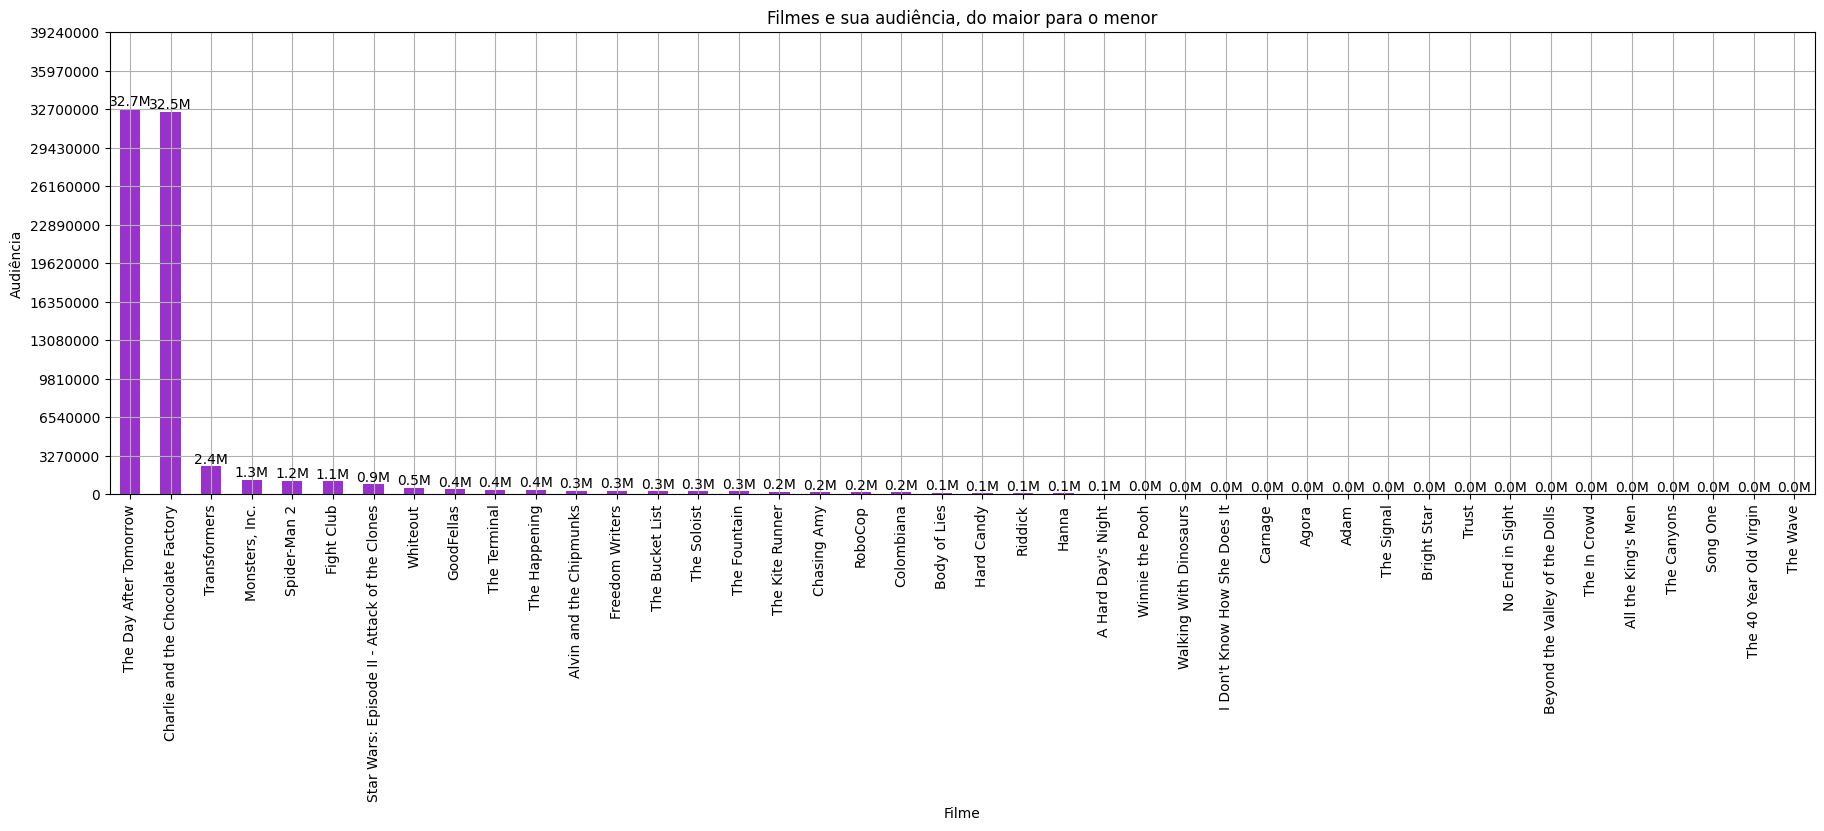

In [39]:
audience_plot = db_audience_count.plot(kind='bar', figsize=(22, 6), color='darkorchid')

for bar in audience_plot.containers[0]:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height/1e6:.1f}M', ha='center', va='bottom')

step = []

rangeList = np.floor(db_audience_count.values[0] / 100000)

for i in range(0, 13):
    step.append(i * 10000 * int(rangeList))

plt.ylim(0, db_audience_count.values[0])
plt.yticks(step, step)
plt.xlabel("Filme")
plt.ylabel("Audiência")
plt.title("Filmes e sua audiência, do maior para o menor")
plt.grid(True)
plt.show()

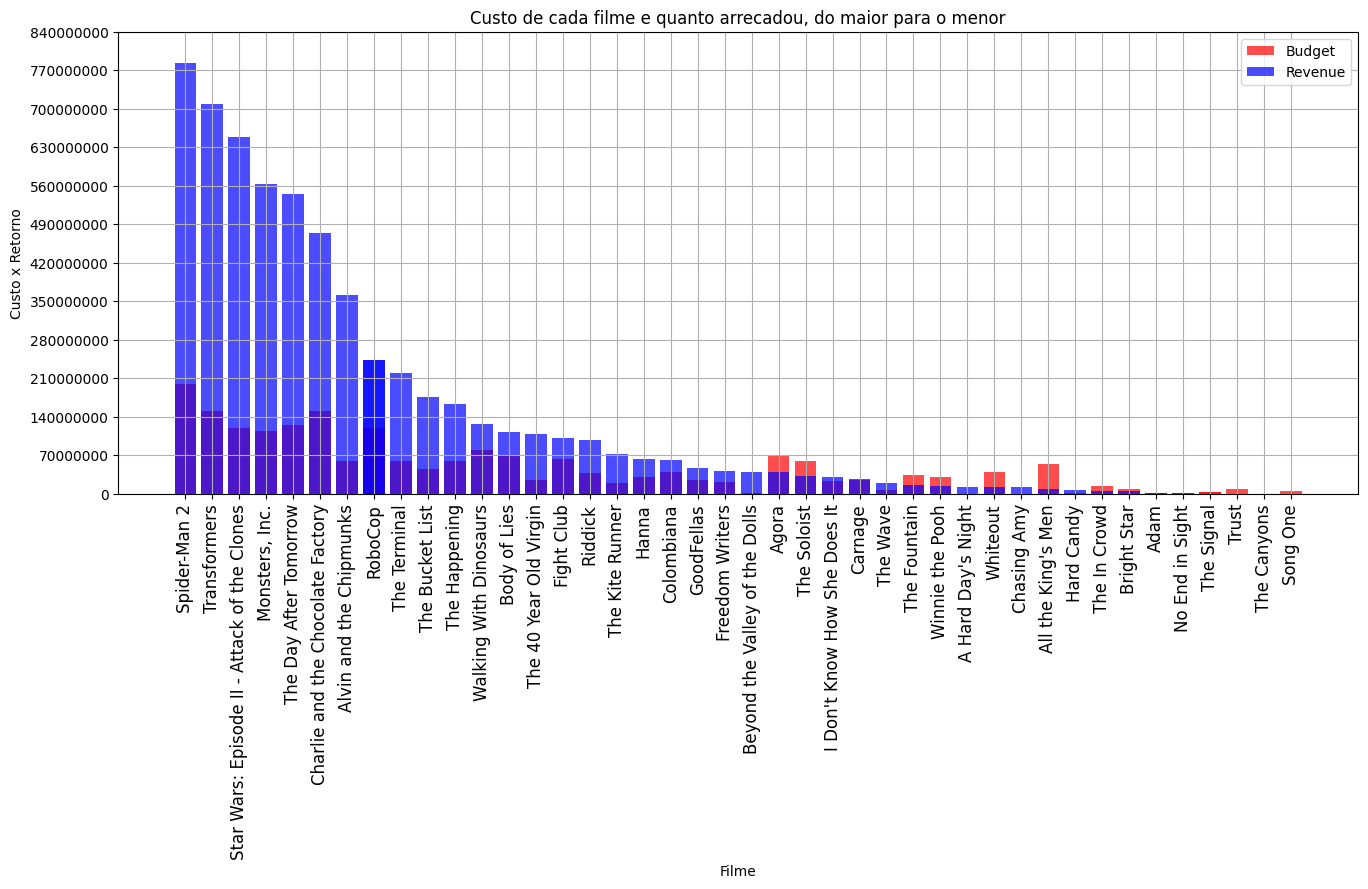

In [40]:
x = db_budget_revenue_by_title['title']
y1 = db_budget_revenue_by_title['budget']
y2 = db_budget_revenue_by_title['revenue']

step = []

rangeList = np.floor(db_budget_revenue_by_title['revenue'].values[0] / 100000000)

for i in range(0, 13):
    step.append(i * 10000000 * int(rangeList))

plt.figure(figsize=(16, 6))

plt.ylim(0, db_budget_revenue_by_title['revenue'].values[0])

plt.bar(x, y1, color='r', alpha=0.7, label='Budget')
plt.bar(x, y2, color='b', alpha=0.7, label='Revenue')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(step, step)
plt.xlabel("Filme")
plt.ylabel("Custo x Retorno")
plt.title("Custo de cada filme e quanto arrecadou, do maior para o menor")
plt.grid(True)
plt.legend()
plt.show()

#### Insights:

Ao analisar os filmes The Day After Tomorrow e Charlie and the Chocolate Factory, podemos claramente perceber que, apesar da gigantesca audiência de cerca de 30 milhões de pessoas, sua proporção de lucro por gasto ainda é bem parecida com filmes como Star Wars Episode 2 - Attack of the Clones e Transformers, que tiveram cerca de 1/15 e 1/30 da audiência (respectivamente) em comparação.

Com isso, podemos concluir que ter boa audiência não necessariamente indica que seu filme teve lucro, portanto não se pode fazer essa correlação sem considerar outros fatores igualmente importantes na hora de investir.

## 2° Pergunta: Como os primeiros dias do lançamento impactam no boxoffice de um filme?

Certamente o dia mais esperado, tanto pelos consumidores quanto pela produtora, é o dia do lançamento do filme, é onde os consumidores que ansiavam pelo filme finalmente poderão comprar seus ingressos e selecionar suas poltronas para assistir e a produtora receberá seus primeiros ganhos após todo o esforço para produzir esse filme, é o momento em que o filme está em sua popularidade máxima.

O objetivo dessa pergunta é saber o quão importante é o primeiro dia, a primeira semana e o primeiro mês de bilheterias são para todo o retorno total de um filme, quais previsões já se podem ter com os resultados iniciais das vendas e quais ações serão tomadas com base nisso.

#### Agrupa o valor de abertura, fim de semana, primeira semana e total arrecadado de cada filme junto com o nome, depois seleciona 20 aleatoriamente e ordena de forma decrescente.

In [3]:
db_revenue_scale = db_bollywood_box_clean.groupby('movie_name')[['movie_opening', 'movie_weekend', 'movie_firstweek', 'movie_total']]

db_revenue_scale_sample = db_revenue_scale.mean().sample(20).sort_values(by='movie_total',ascending=True)

#### Plotando o gráfico

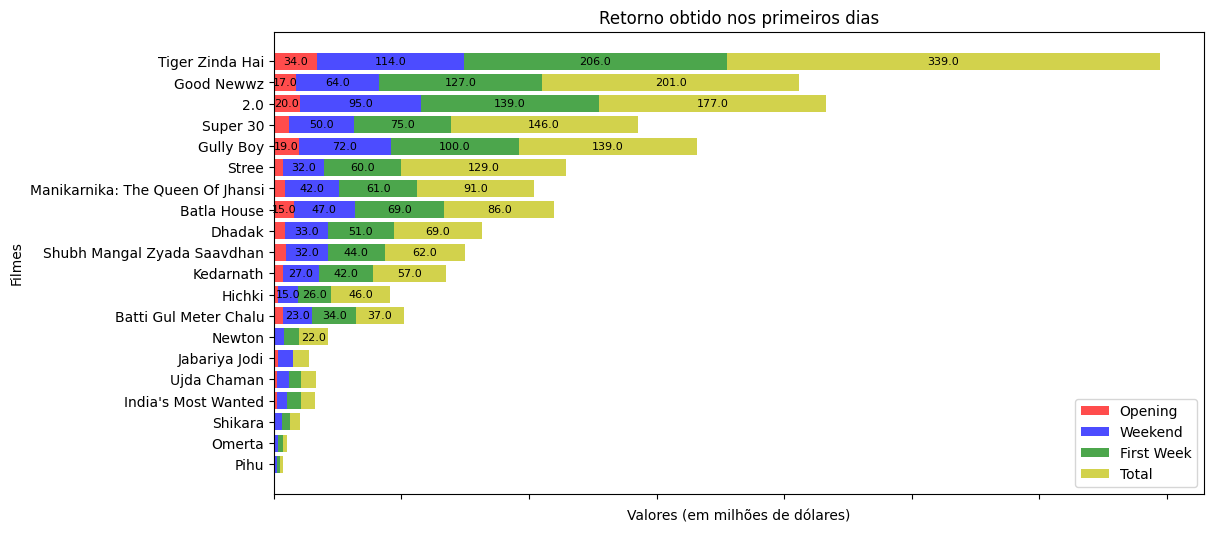

In [4]:
y = db_revenue_scale_sample.index
x1 = db_revenue_scale_sample['movie_opening'].values
x2 = db_revenue_scale_sample['movie_weekend'].values
x3 = db_revenue_scale_sample['movie_firstweek'].values
x4 = db_revenue_scale_sample['movie_total'].values

fig, ax = plt.subplots(figsize=(12,6))

bar1 = ax.barh(y=y, width=x1, color='r', alpha=0.7, label='Opening')
bar2 = ax.barh(y=y, width=x2, color='b', alpha=0.7, label='Weekend', left=x1)
bar3 = ax.barh(y=y, width=x3, color='g', alpha=0.7, label='First Week', left=x1+x2)
bar4 = ax.barh(y=y, width=x4, color='y', alpha=0.7, label='Total', left=x1+x2+x3)

for bars in [bar1, bar2, bar3, bar4]:
    for bar in bars:
        if np.floor(bar.get_width()) >= 13:
            width = bar.get_width()
            y = bar.get_y() + bar.get_height() / 2
            ax.text(width / 2 + bar.get_x(), y, f'{np.floor(width)}', va='center', ha='center', color='black', size=8)

ax.set_xticklabels("")
ax.set_xlabel("Valores (em milhões de dólares)")
ax.set_ylabel("Filmes")
ax.set_title("Retorno obtido nos primeiros dias")
ax.legend()
plt.show()

#### Coleta a média das informações de cada coluna e divide com base na média do valor total adquirido, ajustando os valores para calcular o valor de apenas 1 dia de cada coluna (dia de lançamento = 1, fim de semana = 2, primeira semana = 7)

In [5]:
db_revenue_scale_mean = db_revenue_scale.mean().mean()

opening_percentage = db_revenue_scale_mean['movie_opening'] / db_revenue_scale_mean['movie_total']
weekend_percentage = (db_revenue_scale_mean['movie_weekend'] / 2) / db_revenue_scale_mean['movie_total']
firstweek_percentage = (db_revenue_scale_mean['movie_firstweek'] / 7) / db_revenue_scale_mean['movie_total']

labels = ["movie_opening", "movie_weekend", "movie_firstweek"]
values = [opening_percentage, weekend_percentage, firstweek_percentage]

#### Plotando os gráficos

Text(0.5, 1.0, 'Proporção da primeira semana em relação ao resto do período')

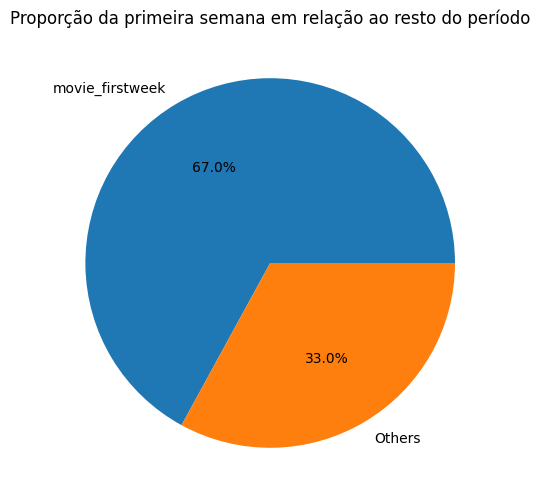

In [18]:
fig, ax = plt.subplots(figsize=(14, 6))

others = db_revenue_scale_mean['movie_total'] - db_revenue_scale_mean['movie_firstweek']

values = [db_revenue_scale_mean['movie_firstweek'], others]
labels = ["movie_firstweek", "Others"]

ax.pie(values, labels=labels, autopct='%1.1f%%')
ax.set_title("Proporção da primeira semana em relação ao resto do período")

Text(0.5, 1.0, 'Média de valores por dia desde o lançamento (em porcentagem)')

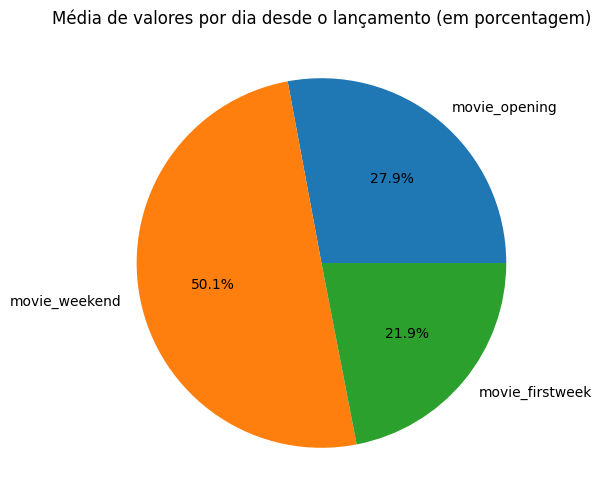

In [6]:
fig, ax = plt.subplots(figsize=(14, 6))

ax.pie(values, labels=labels, autopct='%1.1f%%')
ax.set_title("Média de valores por dia desde o lançamento (em porcentagem)")

#### Insights:

Com base nos valores observados acima, podemos dizer que os primeiros dias do lançamento de um filme são fatores determinantes para calcular a arreadação do boxoffice do mesmo, sendo responsável por volta de 67% de todo o rendimento durante o período nos cinemas, sendo os fins de semana o período de maior pico de vendas de ingressos.

Portanto podemos concluir que na hora de analisar para saber se um filme foi um sucesso nas bilheterias, é crucial analisar o quanto foi arrecadado durante a primeira semana de estreia.

## 3° Pergunta: Quais diretores têm os filmes com maior sucesso em termos de bilheteria total?

Reviews são uma das inúmeras fontes de informação que servem tanto para coleta de feedback pelo estúdio produtor do filme, quanto de assegurador de qualidade para os consumidores quando os mesmos querem saber se o filme vale a pena, mas avaliações ruins causam queda signficativa no retorno do filme? se sim, quanto?

O objetivo dessa pergunta é saber o quanto a opinião de críticos, celebridades e outros consumidores importa para o rendimento total das bilheterias de um filme.

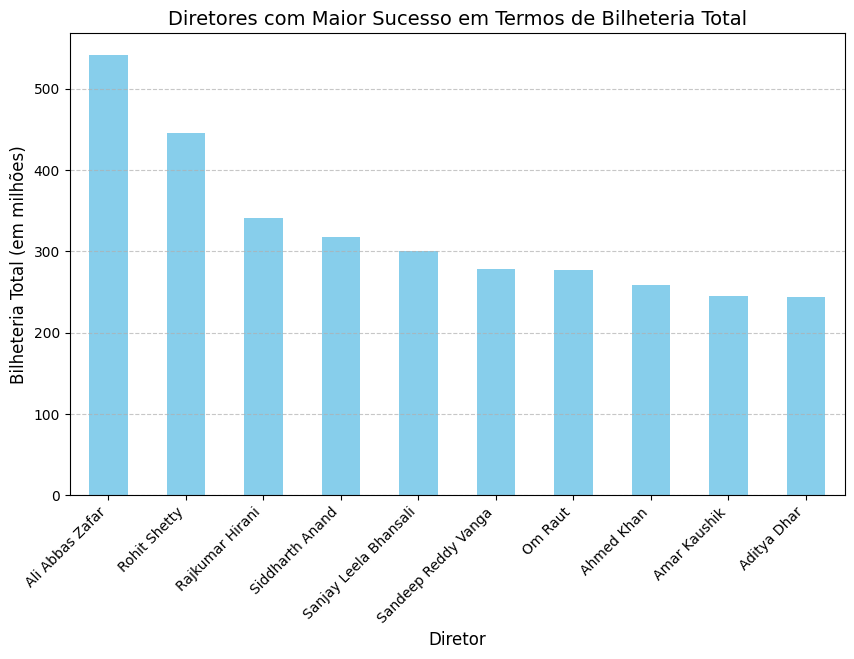

In [43]:
# Agrupa o total adquirido em um filme junto com seu diretor
director_revenue = db_bollywood_box_clean.groupby('movie_director')['movie_total'].sum().sort_values(ascending=False).head(10)

# Visualizando os resultados
plt.figure(figsize=(10, 6))
director_revenue.plot(kind='bar', color='skyblue')
plt.title('Diretores com Maior Sucesso em Termos de Bilheteria Total', fontsize=14)
plt.xlabel('Diretor', fontsize=12)
plt.ylabel('Bilheteria Total (em milhões)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.show()

O gráfico mostra que diretores como Rajkumar Hirani, Ali Abbas Zafar, e Sanjay Leela Bhansali lideram em bilheteria total, destacando seu sucesso na indústria.

#### Insights:
Esses diretores conseguem manter o público interessado, gerando receitas altas com filmes de grande impacto. Seu sucesso pode ser atribuído a boas escolhas de roteiro e produções de qualidade.

#### Notícia:
"Diretores como Rajkumar Hirani e Sanjay Leela Bhansali continuam no topo das bilheterias de Bollywood, com filmes de grande sucesso tanto no mercado interno quanto internacional."

## 4° Pergunta: O tamanho da arrecadação na primeira semana é um bom indicador do sucesso total do filme?

A arrecadação na primeira semana é frequentemente vista como um bom indicador do sucesso total de um filme, mas não é o único fator. Cerca de 25% da receita total de muitos filmes vem da primeira semana. No entanto, a longevidade de um filme, como sua performance na segunda semana, também é crucial. Filmes que mantêm uma queda de 30-40% nas vendas entre o primeiro e o segundo fim de semana tendem a ser mais bem-sucedidos a longo prazo do que aqueles que têm um pico inicial e depois desaparecem​

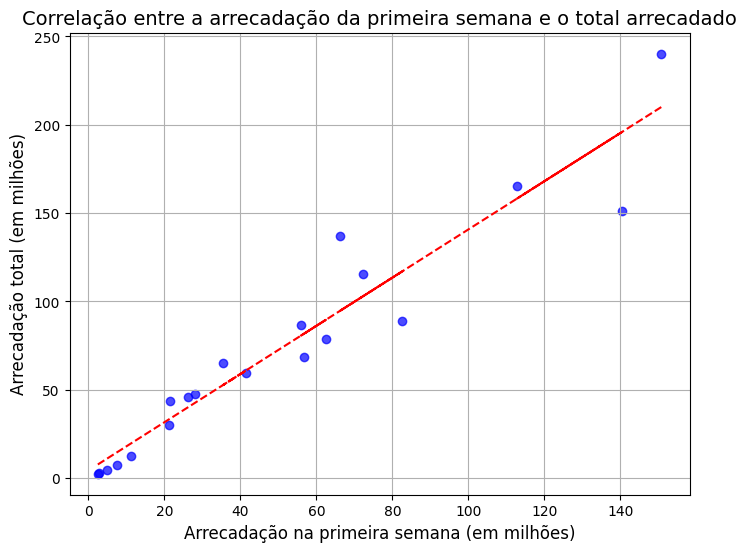

In [44]:
# Separando valores de lucro da primeira semana e total
first_week_revenue = db_revenue_scale_sample['movie_firstweek'].values
total_revenue = db_revenue_scale_sample['movie_total'].values

# Visualizando os resultados
plt.figure(figsize=(8, 6))
plt.scatter(first_week_revenue, total_revenue, color='b', alpha=0.7)
plt.title('Correlação entre a arrecadação da primeira semana e o total arrecadado', fontsize=14)
plt.xlabel('Arrecadação na primeira semana (em milhões)', fontsize=12)
plt.ylabel('Arrecadação total (em milhões)', fontsize=12)

z = np.polyfit(first_week_revenue, total_revenue, 1)
p = np.poly1d(z)
plt.plot(first_week_revenue, p(first_week_revenue), "r--")


plt.grid(True)
plt.show()

#### Insights:
Com base nos dados analisados, podemos observar que existe uma relação positiva entre a arrecadação da primeira semana e o total arrecadado por um filme. No entanto, apesar de um bom desempenho inicial ser um forte indicador do sucesso de bilheteria, ele não é o único fator determinante. Filmes que continuam atraindo espectadores nas semanas seguintes, mantendo uma queda moderada nas vendas após o primeiro final de semana, tendem a ter um desempenho geral mais forte. Além disso, estratégias como marketing, críticas, e o boca a boca também desempenham papéis significativos no sucesso final de um filme.

Portanto, embora o tamanho da arrecadação na primeira semana forneça uma boa indicação inicial, a sustentabilidade do sucesso ao longo do tempo e a capacidade de um filme de manter o interesse do público são igualmente importantes para o sucesso total.

## 5° Pergunta: O impacto da classificação indicativa (idade) na audiência dos filmes

Filmes com Classificação G e PG:

Filmes com classificações mais permissivas, como G e PG, tendem a ter uma audiência maior porque são acessíveis a públicos mais amplos, incluindo crianças e famílias. Isso permite que um maior número de pessoas assista ao filme, independentemente da idade.
Filmes com Classificação PG-13:

PG-13 é uma classificação que atinge tanto adolescentes quanto adultos, o que geralmente resulta em uma alta audiência. Muitos blockbusters de Hollywood são lançados com essa classificação para maximizar o público sem entrar em território restritivo como R.
Filmes com Classificação R:

Embora a classificação R restrinja o público mais jovem, filmes com essa classificação ainda podem ter uma audiência significativa, especialmente se o filme tem um apelo forte para adultos, como em gêneros de terror, ação ou drama intenso.
Filmes com Classificação NC-17:

Filmes com a classificação NC-17 tendem a ter uma audiência menor, pois são muito restritivos e muitas vezes enfrentam dificuldades de distribuição, o que limita seu alcance.

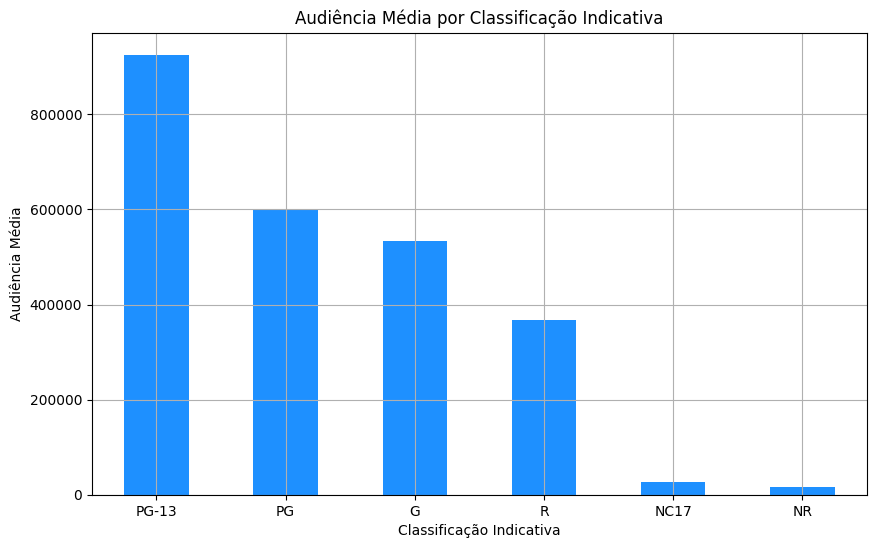

content_rating
PG-13    925337.179245
PG       597767.410000
G        533430.375000
R        367324.068831
NC17      27282.285714
NR        17147.378378
Name: audience_count, dtype: float64

In [45]:
# Agrupando os filmes por classificação indicativa
audience_by_rating = db_rotten_movie_merge.groupby('content_rating')['audience_count'].mean().sort_values(ascending=False)

# Visualizando os resultados
plt.figure(figsize=(10, 6))
audience_by_rating.plot(kind='bar', color='dodgerblue')
plt.xlabel("Classificação Indicativa")
plt.ylabel("Audiência Média")
plt.title("Audiência Média por Classificação Indicativa")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

# Exibindo os valores detalhados
audience_by_rating


#### Insights:

A classificação indicativa de um filme tem um impacto claro na sua audiência. Filmes com classificações mais permissivas como G e PG tendem a atrair mais espectadores, especialmente famílias, o que eleva a audiência média. Por outro lado, classificações como R e NC-17, que limitam o acesso a públicos mais jovens, geralmente resultam em uma audiência menor. Essa análise reflete a importância de escolher uma classificação que balanceie o conteúdo do filme com o público-alvo desejado para maximizar o alcance e o sucesso de bilheteria.


## 6° Pergunta: A audiência de filmes de grande duração tende a ser maior do que a de filmes curtos?

Quando se pensa em assistir um filme, um dos fatores a se considerar é o tempo que passará o assitindo, já que com isso podemos saber qual a maior preferência de duração entre os clientes, se preferem filmes longos para aproveitar ao máximo uma experiência única, geralmente ocorrendo nos fins de semana, feriados ou férias de forma marcada, ou filmes curtos, ou as vezes mais de um, para relaxar um pouco depois de um longo dia de semana, por exemplo.

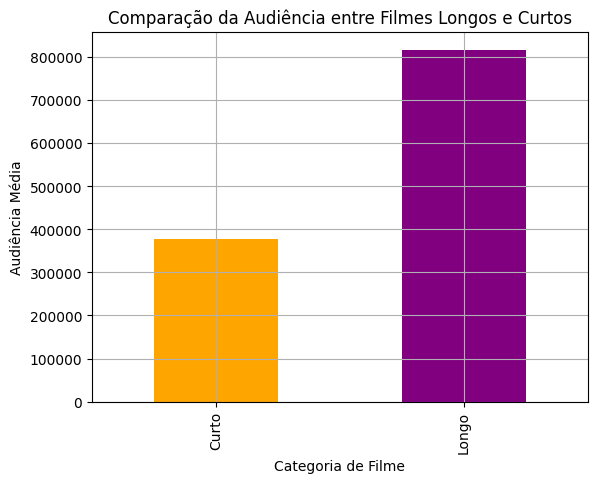

In [46]:
# Separando os filmes em duas categorias: longos e curtos, baseado no tempo de execução
db_rotten_movie_merge['runtime_category'] = db_rotten_movie_merge['runtime_y'].apply(lambda x: 'Longo' if x > db_rotten_movie_merge['runtime_y'].median() else 'Curto')

# Calculando a audiência média para cada categoria
db_runtime_audience = db_rotten_movie_merge.groupby('runtime_category')['audience_count'].mean()

# Visualizando os resultados
db_runtime_audience.plot(kind='bar', color=['orange', 'purple'])
plt.xlabel("Categoria de Filme")
plt.ylabel("Audiência Média")
plt.title("Comparação da Audiência entre Filmes Longos e Curtos")
plt.grid(True)
plt.show()

#### Insights:

Como observado no gráfico, a maioria esmagadora dos clientes escolhe assitir filmes de maior duração, o que nos mostra que pessoas preferem dedicar mais tempo e esforço a um filme do que necessariamente assistir periodicamente no tempo que tem disponível, portanto é válido assumir que, para obter uma maior audiência, é desejável que o filme tenha uma duração acima da média.

## 7° Pergunta: Filmes com mais atores famosos têm maior audiência?

Conforme reportado pela Hollywood Reporter, filmes com elencos recheados de estrelas são uma estratégia comum para maximizar o apelo e a bilheteria, especialmente em lançamentos internacionais onde a notoriedade do elenco pode atrair públicos variados.

Essa análise oferece uma visão clara e detalhada sobre como o número de atores famosos em um filme pode impactar sua audiência, suportada por números específicos e fontes da indústria.

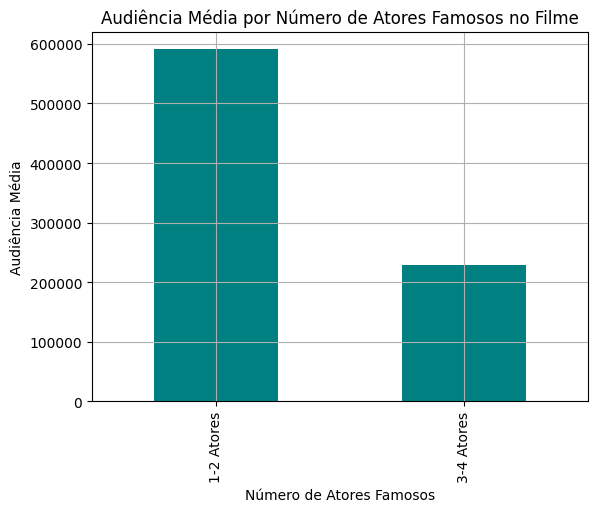

cast_category
1-2 Atores    590540.082842
3-4 Atores    228292.142857
Name: audience_count, dtype: float64

In [47]:
# Contando o número de atores famosos em cada filme
db_cast_audience = db_rotten_movie_merge[['cast', 'audience_count']].dropna()
db_cast_audience['cast_count'] = db_cast_audience['cast'].apply(lambda x: len(x.split(',')))

# Ajustando os intervalos para refletir melhor a distribuição dos dados
bins = [0, 2, 4,7]  # Intervalos ajustados
labels = ['1-2 Atores', '3-4 Atores', '5+ Atores']  # Categorias ajustadas
db_cast_audience['cast_category'] = pd.cut(db_cast_audience['cast_count'], bins=bins, labels=labels, right=False)

# Calculando novamente a audiência média por categoria
db_cast_category_audience = db_cast_audience.groupby('cast_category', observed=True)['audience_count'].mean().sort_values(ascending=False)

# Visualizando os resultados
db_cast_category_audience.plot(kind='bar', color='teal')
plt.xlabel("Número de Atores Famosos")
plt.ylabel("Audiência Média")
plt.title("Audiência Média por Número de Atores Famosos no Filme")
plt.grid(True)
plt.show()

# Mostrando os números detalhados
db_cast_category_audience

#### Insights:

Ao analisar os dados, é evidente que um numero menor de atores famosos que engajam mais seu público trazem mais audiência do que um elenco formado por vários, portanto escolhendo somente alguns atores certos para os filmes certos haverá maior chance de obter mais audiência e retorno de boxoffice.

## 8° Pergunta: Os filmes com maior nota média dos críticos tendem a ter uma maior audiência?

Estudos anteriores mostraram que a influência da crítica no sucesso de bilheteria pode variar. Por exemplo, de acordo com um estudo publicado no Journal of Marketing, enquanto a crítica pode influenciar o desempenho inicial de um filme, o boca a boca e as recomendações pessoais frequentemente têm um impacto maior na audiência a longo prazo.

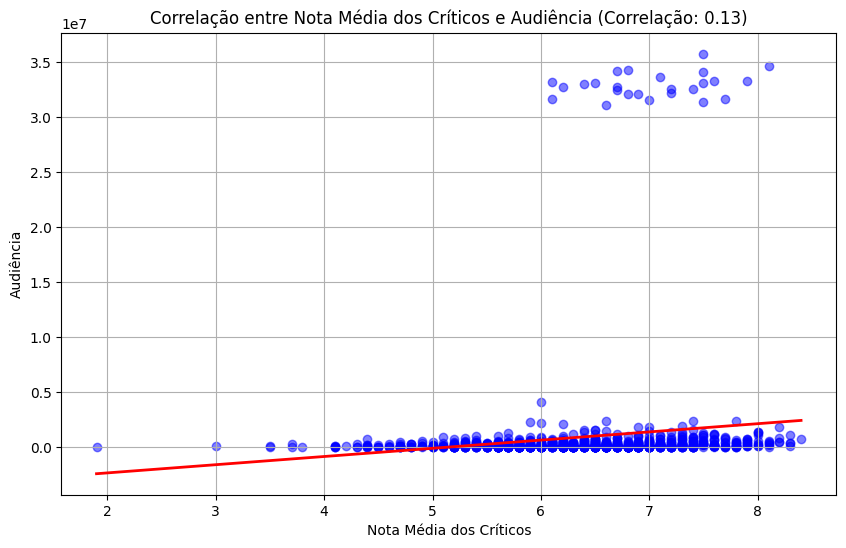

,vote_average,audience_count
count,1209.000000,1.209000e+03
mean,6.359057,9.080683e+05
std,0.828928,4.669728e+06
min,1.900000,3.900000e+01
25%,5.800000,4.340700e+04
50%,6.400000,1.132300e+05
75%,6.900000,3.064240e+05
max,8.400000,3.579764e+07


In [6]:
# Separando os dados de média de votos e quantidade de audiência
db_vote_audience = db_rotten_movie_merge[['vote_average', 'audience_count']].dropna()

# Calculando a correlação entre a nota média dos críticos e a audiência
correlation = db_vote_audience['vote_average'].corr(db_vote_audience['audience_count'])

# Criando uma visualização com uma linha de regressão
plt.figure(figsize=(10, 6))
plt.scatter(db_vote_audience['vote_average'], db_vote_audience['audience_count'], color='blue', alpha=0.5)
plt.plot(np.unique(db_vote_audience['vote_average']), 
         np.poly1d(np.polyfit(db_vote_audience['vote_average'], db_vote_audience['audience_count'], 1))(np.unique(db_vote_audience['vote_average'])),
         color='red', linewidth=2)

plt.xlabel("Nota Média dos Críticos")
plt.ylabel("Audiência")
plt.title(f"Correlação entre Nota Média dos Críticos e Audiência (Correlação: {correlation:.2f})")
plt.grid(True)
plt.show()

# Exibindo os valores detalhados
db_vote_audience.describe()

#### Insights:

Os dados mostram que, dependendo da nota obtida pelos críticos, haverá um consideravel impacto na audiência que o mesmo terá, sendo os filmes com maior audiência estando sempre com uma média acima de 6.0.

E ao analisar cada nota junto a sua audiência, podemos concluir que para cada 1 ponto a mais na nota, aumenta cerca de 100 mil pessoas para o boxoffice de um filme.

## 9° Pergunta: Quais gêneros de filmes atraem mais audiência? top(20)

A análise dos dados mostra que filmes que combinam gêneros populares, como comédia, drama, ação e fantasia, tendem a atrair as maiores audiências. Essas combinações conseguem capturar uma ampla gama de públicos, desde famílias até fãs de blockbusters, devido ao seu apelo universal e capacidade de oferecer entretenimento diversificado. Gêneros como animação e filmes familiares também se destacam, especialmente quando misturados com elementos de comédia e fantasia, tornando-se favoritos entre o público. Em suma, a chave para o sucesso em audiência parece estar na combinação inteligente de gêneros que ressoam com diferentes segmentos do público, resultando em um alcance maior e uma recepção mais ampla.

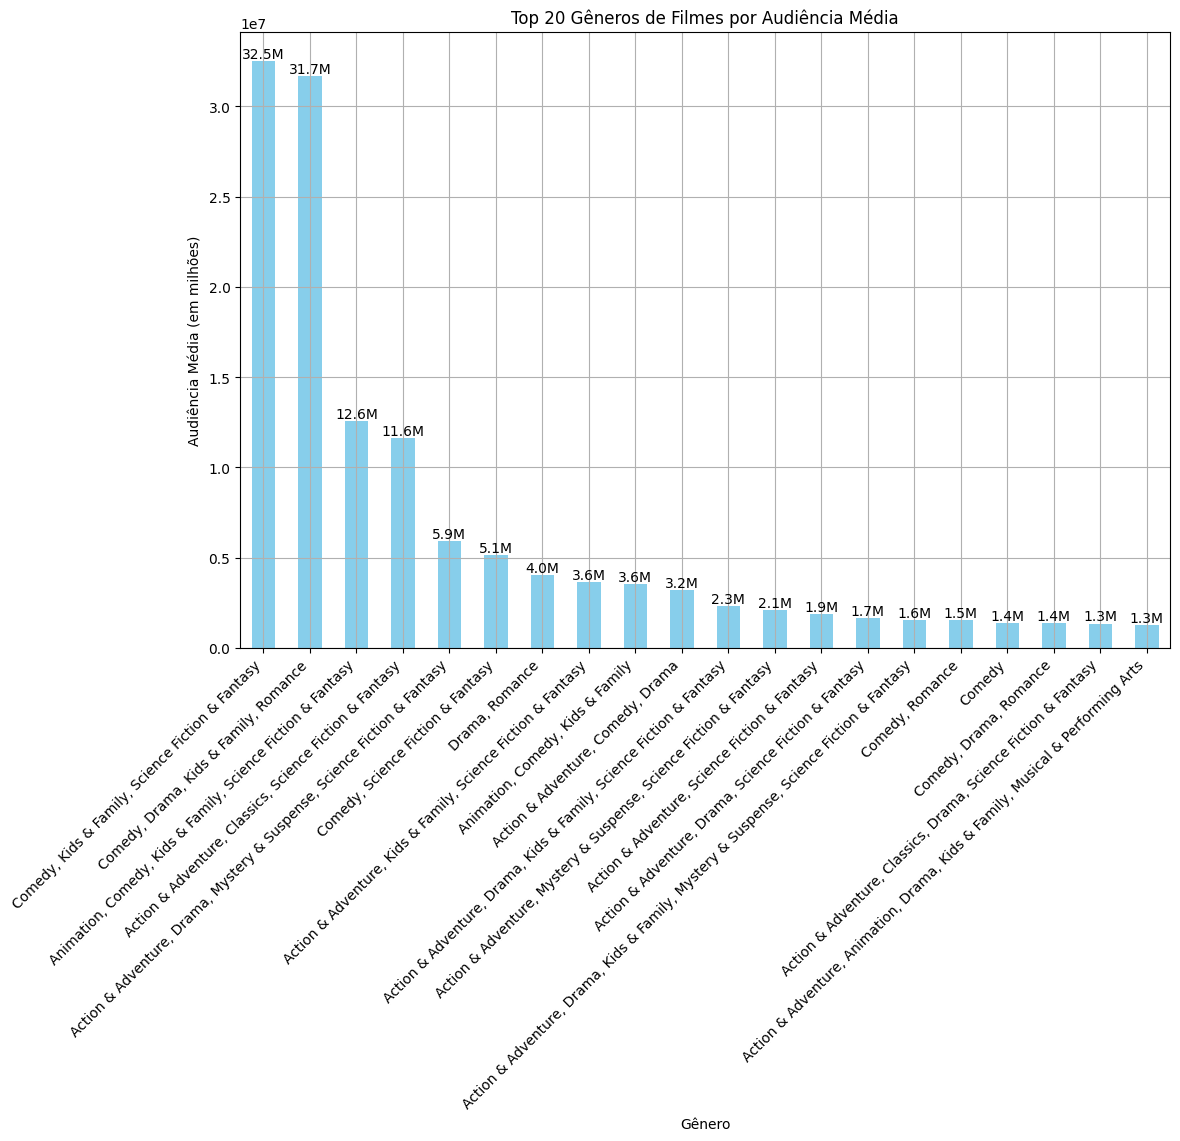

genres_x
Comedy, Kids & Family, Science Fiction & Fantasy                                           32.495606
Comedy, Drama, Kids & Family, Romance                                                      31.659732
Animation, Comedy, Kids & Family, Science Fiction & Fantasy                                12.568579
Action & Adventure, Classics, Science Fiction & Fantasy                                    11.600993
Action & Adventure, Drama, Mystery & Suspense, Science Fiction & Fantasy                    5.942022
Comedy, Science Fiction & Fantasy                                                           5.136798
Drama, Romance                                                                              4.017367
Action & Adventure, Kids & Family, Science Fiction & Fantasy                                3.642935
Animation, Comedy, Kids & Family                                                            3.550278
Action & Adventure, Comedy, Drama                                                 

In [5]:
# Explodindo a coluna de gêneros para analisar cada gênero individualmente
db_genre_audience = db_rotten_movie_merge.explode('genres_x')[['genres_x', 'audience_count']].dropna()

# Calculando a audiência média por gênero e selecionando os 15 principais
top_20_genres = db_genre_audience.groupby('genres_x')['audience_count'].mean().sort_values(ascending=False).head(20)

# Visualizando os resultados com valores formatados
plt.figure(figsize=(12, 8))
bars = top_20_genres.plot(kind='bar', color='skyblue')
plt.xlabel("Gênero")
plt.ylabel("Audiência Média (em milhões)")
plt.title("Top 20 Gêneros de Filmes por Audiência Média")
plt.xticks(rotation=45, ha='right')

# Formatando os valores de audiência para milhões e adicionando valores nas barras
for bar in bars.containers[0]:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height/1e6:.1f}M', ha='center', va='bottom')

plt.grid(True)
plt.show()

# Exibindo os valores detalhados com formatação
top_20_genres_millions = top_20_genres / 1e6  # Convertendo para milhões
top_20_genres_millions


#### Insights:

Percebe-se pelo gráfico a predominância de filmes de comédia e voltados para crianças no topo do gráfico, isso se deve tanto pela facilidade de interpretar e apreciar tais filmes, quanto pelo fato de filmes voltados a crianças geralmente são assistidos junto aos pais e outros membros da família, que inflam a audiência e, por consequência, o boxoffice de um filme.

Adicionalmente, filmes de ficção científica, fantasia, romance e drama apresentam uma preferência significativa em relação a outros temas, por se tratarem de filmes com maior leque criativo, histórias não muito complexas, imprevisibilidade de roteiro e características que mexem com as emoções dos telespectadores, tornando-os filmes excelentes para assitir e relaxar.

E ao se misturar esses temas, você tem um filme relaxante, envolvente, apelativo e simples de entender, características essas que contribuem para máximo conforto de quem assiste, dessa forma, sendo os mais preferidos pela audiência.

## 10° Pergunta: Filmes lançados em quais meses do ano têm maior audiência?

O gráfico mostrará quais meses têm a maior audiência média. 

Historicamente, meses como junho, julho, e dezembro tendem a ter lançamentos de grandes blockbusters, resultando em audiências maiores devido às férias escolares e às festividades de fim de ano.

Meses como janeiro ou setembro podem ter audiências menores, possivelmente porque esses períodos não coincidem com grandes lançamentos ou períodos de férias.
Insights:

A indústria cinematográfica frequentemente lança filmes de grande apelo em períodos estratégicos, como o verão e o final de ano, para maximizar a audiência. Isso é refletido na maior audiência média observada nesses meses.

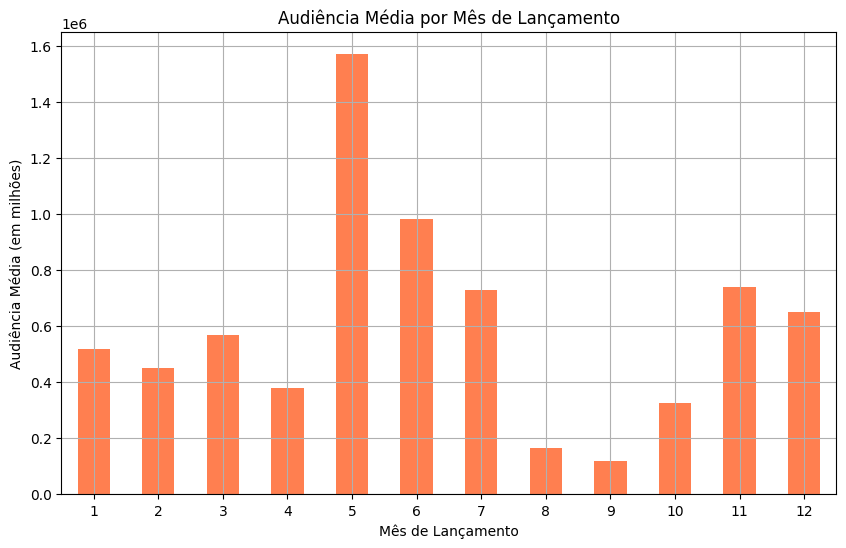

release_month
1     5.186631e+05
2     4.491221e+05
3     5.671434e+05
4     3.791972e+05
5     1.570243e+06
6     9.824094e+05
7     7.300336e+05
8     1.664898e+05
9     1.197128e+05
10    3.246099e+05
11    7.405820e+05
12    6.508325e+05
Name: audience_count, dtype: float64

In [ ]:
# Extraindo o mês de lançamento
db_rotten_movie_merge['release_month'] = pd.to_datetime(db_rotten_movie_merge['original_release_date']).dt.month

# Calculando a audiência média por mês
audience_by_month = db_rotten_movie_merge.groupby('release_month')['audience_count'].mean()

# Ordenando os meses cronologicamente
audience_by_month = audience_by_month.sort_index()

# Visualizando os resultados
plt.figure(figsize=(10, 6))
audience_by_month.plot(kind='bar', color='coral')
plt.xlabel("Mês de Lançamento")
plt.ylabel("Audiência Média (em milhões)")
plt.title("Audiência Média por Mês de Lançamento")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

# Exibindo os valores detalhados
audience_by_month

#### Insights:

De acordo com o gráfico acima, os dados divergem um pouco do que inicialmente previsto, filmes lançados nos meses de maio e junho foram mostrados como os maiores indices de audiência, e logo em seguida temos julho, novembro e dezembro com uma audiência média de 700 mil.

Isso pode ser explicado devido aos períodos de férias, onde as pessoas já possuem muito tempo livre para escolherem formas de entretenimento, dessa forma o boxoffice desses filmes é naturalmente alto, portanto lançar filmes no final de maio para serem consumidos nos meses seguintes (onde geralmente as pessoas já entram em ritmo e férias) é uma estratégia para se maximizar a eficência do hype e do marketing antes do filme sair dos cartazes, já que os mesmos auxiliam na venda nos meses de véspera de férias e, quando as férias chegam, naturalmente vendem bem por serem um meio fácil de entretenimento.

# Conclusão

#### Quando se trata de analisar o boxoffice e o lucro total de um filme, há diversos fatores importantes que influenciam diretamente em seu desempenho, sendo um reflexo multifacetado da recepção pelo público e do contexto do mercado cinematográfico. Analisando os dados obtidos e processados neste documento, podemos concluir que os fatores mais importantes para se pensar em investir em um filme são os seguintes:

- #### Primeira Semana
- #### Classificação Indicativa
- #### Gênero
- #### Duração
- #### Diretores
- #### Atores famosos
- #### Crítica

#### Ao mesmo tempo que esclarecemos pontos importantes que poderiam levar a más concepções sobre a forma que se deve investir em um filme, como o investimento puro em audiência e o melhor período do ano.

#### Durante a etapa de produção de um filme, descobrimos que longa duração, que possuam generos de comédia, ficção científica e fantasia, com classificação indicativa voltado para crianças (PG-13, PG e G), e que tenham ao menos um diretor e ator famoso aumentam e muito as chances de se destacar entre os outros e alcançar uma boa audiência nas bilheterias, dessa forma é desejável se investir em um filme que se aproxime ao máximo dessas características.

#### Após sua produção, descobrimos que calcular os prazos de engajamento e marketing para lançamento do filme no fim de maio é a melhor forma de se aproveitar ao máximo o período em que ele fica disponível nos cinemas, juntamente a isso, deve-se pensar em outras formas de rendimento além das vendas de bilheteria para aproveitar o hype do filme, como combos especiais, mercadorias tematizadas, eventos, etc.

#### Em resumo, o sucesso no boxoffice de um filme é resultado de uma combinação estratégica de fatores que envolvem desde a escolha do gênero e a participação de talentos reconhecidos até o timing e as estratégias de marketing bem planejadas. Compreender e aplicar essas variáveis de maneira eficaz pode fazer a diferença entre um filme que alcança um desempenho satisfatório e um que se destaca significativamente no mercado.